# 그래프 이론

## 서로소 집합

- 공통 원소가 없는 두 집합    
    ex. {1, 2} , {3, 4}    


- 서로소 집합 자료구조: 서로소 부분 집합들로 나누어진 원소들의 데이터를 처리하기 위한 자료구조
    - union(합집합): 2개의 원소가 포함된 집합을 하나의 집합으로 합치는 연산
    - find(찾기): 특정한 원소가 속한 집합이 어떤 집합인지 알려주는 연산    


- 트리 자료구조 이용
    1. union(합집합) 연산을 확인하여, 서로 연결된 두 노드 A, B를 확인한다.
        - A와 B의 루트 노드 A', B'를 각각 찾는다.
        - A'를 B'의 부모 노드로 설정한다(B'가 A'를 가리키도록 한다)
    2. 모든 union(합집합) 연산을 처리할 때까지 1번 과정을 반복한다.

<b>기본적인 서로소 집합 알고리즘 소스코드</b>

In [3]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i

# union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

# 각 원소가 속한 집합 출력
print('각 원소가 속한 집합: ', end='')
for i in range(1, v+1):
    print(find_parent(parent, i), end=' ')

print()

# 부모 테이블 내용 출력
print('부모 테이블: ', end='')
for i in range(1, v+1):
    print(parent[i], end=' ')

6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 2 1 5 5 

최악의 시간 복잡도는 $O(VM)$    
<b>경로 압축 기법</b>을 적용하면 시간 복잡도를 개선시킬 수 있다.
- find 함수를 재귀적으로 호출한 뒤에 부모 테이블 값을 갱신하는 기법

In [4]:
# 경로 압축 기법 소스코드
def find_parent(parent, x):
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

각 노드에 대하여 find 함수를 호출한 이후에, 해당 노드의 루트 노드가 바로 부모 노드가 된다.    
노드의 개수: V, 최대 union 연산: V-1, find 연산: M    
$O(V + M(1+log_{2-M/V}{V}))$

<b>개선된 서로소 집합 알고리즘 소스코드</b>

In [5]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(union 연산)의 개수 입력 받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
# union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)
    
# 각 원소가 속한 집합 출력
print('각 원소가 속한 집합: ', end='')
for i in range(1, v+1):
    print(find_parent(parent, i), end=' ')
print()

# 부모 테이블 내용 출력
print('부모 테이블: ', end='')
for i in range(1, v+1):
    print(parent[i], end=' ')

6 4
1 4
2 3
2 4
5 6
각 원소가 속한 집합: 1 1 1 1 5 5 
부모 테이블: 1 1 1 1 5 5 

## 서로소 집합을 활용한 사이클 판별

서로소 집합은 무방향 그래프 내에서의 <b>사이클</b>을 판별할 때 사용할 수 있다.
1. 각 간선을 확인하며 두 노드의 루트 노드를 확인한다.    
    1-1. 루트 노드가 서로 다르다면 두 노드에 대하여 union 연산을 수행한다.    
    1-2. 루트 노드가 서로 같다면 사이클(Cycle)이 발생한 것이다.
    
    
2. 그래프에 포함되어 있는 모든 간선에 대하여 1번 과정을 반복한다.

그래프에 포함되어 있는 간선의 개수가 E개일 때, 모든 간선을 하나씩 확인하며, 매 간선에 대하여 union 및 find 함수를 호출하는 방식으로 동작

<b>서로소 집합을 활용한 사이클 판별 소스코드</b>

In [7]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

# 노드의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
cycle = False # 사이클 발생 여부

for i in range(e):
    a, b = map(int, input().split())
    # 사이클이 발생한 경우 종료
    if find_parent(parent, a) == find_parent(parent, b):
        cycle = True
        break
    # 사이클이 발생하지 않았다면 합집합(union) 수행
    else:
        union_parent(parent, a, b)
        
if cycle:
    print("사이클이 발생했습니다.")
else:
    print("사이클이 발생하지 않았습니다.")

3 3
1 2
1 3
2 3
사이클이 발생했습니다.


## 신장 트리

하나의 그래프가 있을 때 모든 노드를 포함하면서 사이클이 존재하지 않는 부분 그래프    
트리의 성립 조건(모든 노드가 포함되어 서로 연결되면서 사이클이 존재하지 않는다는 조건)과 같아 <b>신장 트리</b>라고 부름

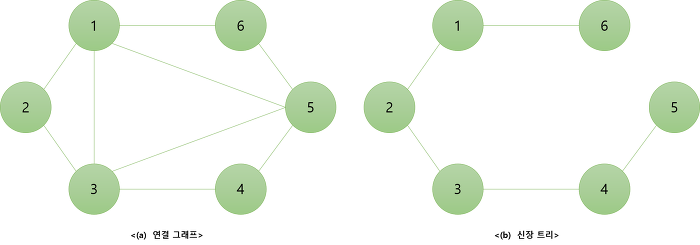

## 크루스칼 알고리즘

<b>최소 신장 트리 알고리즘</b>    
신장 트리 중에서 최소 비용으로 만들 수 있는 신장 트리를 찾는 알고리즘    
ex. N개의 도시가 존재하는 상황에서 두 도시 사이에 도로를 놓아 전체 도시가 서로 연결될 수 있게 도로를 설치하는 경우     
     
대표적인 최소 신장 트리 알고리즘         
그리디 알고리즘으로 분류    
모든 간선에 대하여 정렬을 수행한 뒤에 가장 거리가 짧은 간선부터 집합에 포함시킨다.   
이때 사이클을 발생시킬 수 있는 간선의 경우, 집합에 포함시키지 않는다.    

1. 간선 데이터를 비용에 따라 <b>오름차순으로 정렬</b>한다.
2. 간선을 하나씩 확인하며 현재의 간선이 사이클을 발생시키는지 확인한다.
    - 사이클이 발생하지 않는 경우 최소 신장 트리에 포함시킨다.
    - 사이클이 발생하는 경우 최소 신장 트리에 포함시키지 않는다.
3. 모든 간선에 대하여 2번의 과정을 반복한다. 



<b>크루스칼 알고리즘 소스코드</b>

In [9]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        parent[x] = find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b
        
# 노드의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
# 모든 간선에 대한 정보를 입력 받기
for _ in range(e):
    a, b, cost = map(int, input().split())
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))
    
# 간선을 비용순으로 정렬
edges.sort()

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost
        
print(result)

7 9
1 2 29
1 5 75
2 3 35
2 6 34
3 4 7
4 6 23
4 7 13
5 6 53
6 7 25
159


<b>크루스칼 알고리즘 시간 복잡도</b>
- 간선의 개수: E개일 때, 시간복잡도: $O(ElogE)$

## 위상 정렬

정렬 알고리즘의 일종    
순서가 정해져 있는 일련의 작업을 수행해야 할 때 사용할 수 있는 알고리즘     
사이클이 없는 방향 그래프의 모든 노드를 '방향성에 거스르지 않도록 순서대로 나열하는 것'   
ex. 선수과목을 고려한 학습 순서 설정
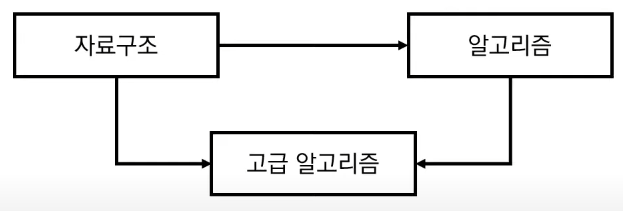

자료구조 - 진입차수: 0, 진출차수: 2    
알고리즘 - 진입차수: 1, 진출차수: 1    
고급 알고리즘 - 진입차수: 2, 진출차수: 0     
    
    
* 진입차수: 특정한 노드로 '들어오는' 간선의 개수
* 진출차수: 특정한 노드에서 나가는 간선의 개수    
     
  
1. 진입차수가 0인 노드를 큐에 넣는다.
2. 큐가 빌 때까지 다음의 과정을 반복한다.
    - 큐에서 원소를 꺼내 해당 노드에서 출발하는 간선을 그래프에서 제거한다.
    - 새롭게 진입차수가 0이 된 노드를 큐에 넣는다.


<b>위상 정렬 소스코드</b>

In [16]:
from collections import deque

# 노드의 개수와 간선의 개수를 입력받기
v, e = map(int, input().split())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v+1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for i in range(v+1)]

# 방향 그래프의 모든 간선 정보를 입력받기
for _ in range(e):
    a, b = map(int, input().split())
    graph[a].append(b) # 정점 A에서 B로 이동 가능
    # 진입차수를 1 증가
    indegree[b] += 1
    
# 위상 정렬 함수
def topology_sort():
    result = [] # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용
    
    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v+1):
        if indegree[i] == 0:
            q.append(i)
            
    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        result.append(now)
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            indegree[i] -= 1
            # 새롭게 진입차수 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)
                
    # 위상 정렬을 수행한 결과 출력
    for i in result:
        print(i, end=' ')
    
topology_sort()

7 8
1 2
1 5
2 3
2 6
3 4
4 7
5 6
6 4
1 2 5 3 6 4 7 

<b>위상 정렬의 시간 복잡도</b>: $O(V+E)$

---

# 실전 문제

## 팀 결성

서로소 집합 알고리즘 문제

In [17]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

n, m =map(int, input().split()) 
parent = [0] * (n+1) # 부모 테이블 초기화

# 부모 테이블 상에서, 부모를 자기 자신으로 초기화
for i in range(0, n+1):
    parent[i] = i 
    
# 각 연산을 하나씩 확인    
for i in range(m):
    oper, a, b = map(int, input().split())
    # 합집합(union) 연산인 경우
    if oper == 0:
        union_parent(parent, a, b)
    # 찾기(find) 연산인 경우
    elif oper == 1:
        if find_parent(parent, a) == find_parent(parent, b):
            print('YES')
        else:
            print('NO')

7 8
0 1 3
1 1 7
NO
0 7 6
1 7 1
NO
0 3 7
0 4 2
0 1 1
1 1 1
YES


## 도시 분할 계획

전체 그래프에서 2개의 최소 신장 트리를 만들어야 함.    
최소 신장 트리 문제 - 크루스칼 알고리즘    
최소 신장 트리를 찾은 뒤에 최소 신장 트리를 구성하는 간선 중에서 가장 비용이 큰 간선을 제거    
최소 신장 트리가 2개의 부분 그래프로 나누어진다.

In [20]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return parent[x]

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b
        

# 노드의 개수와 간선(union 연산)의 개수 입력받기
v, e = map(int, input().split())
parent = [0] * (v+1) # 부모 테이블 초기화

# 모든 간선을 담을 리스트와 최종 비용을 담을 변수
edges = []
result = 0

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, n+1):
    parent[i] = i

# 모든 간선에 대한 정보를 입력받기
for i in range(m):
    a, b, cost = map(int, input().split()) # A번 집과 B번 집을 연결하는 길의 유지비 C
    # 비용순으로 정렬하기 위해서 튜플의 첫 번째 원소를 비용으로 설정
    edges.append((cost, a, b))
    
# 간선을 비용순으로 정렬    
edges.sort()
last = 0 # 최소 신장 트리에 포함되는 간선 중에서 가장 비용이 큰 간선

# 간선을 하나씩 확인하며
for edge in edges:
    cost, a, b = edge
    # 사이클이 발생하지 않는 경우에만 집합에 포함
    if find_parent(parent, a) != find_parent(parent, b):
        union_parent(parent, a, b)
        result += cost
        last = cost
        
print(result - last)

7 12
1 2 3
1 3 2
3 2 1
2 5 2
3 4 4
7 3 6
5 1 5
1 6 2
6 4 1
6 5 3
4 5 3
6 7 4
8


## 커리큘럼

위상 정렬 알고리즘 문제
- 각 노드(강의)에 대하여 인접한 노드를 확인할 때, 인접한 노드에 대하여 현재보다 강의 시간이 더 긴 경우를 찾는다면, 더 오랜 시간이 걸리는 경우의 시간 값을 저장하는 방식으로 결과 테이블을 갱신하여 답을 구할 수 있다.
- 따라서 위상 정렬을 수행하면서, 매번 간선 정보를 확인하여 결과 테이블을 갱신한다.

In [24]:
from collections import deque
import copy

# 노드의 개수 입력받기
v = int(input())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (v+1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for i in range(v+1)]
# 각 강의 시간을 0으로 초기화
time = [0] * (v+1)

# 방향 그래프의 모든 간선 정보를 입력받기
for i in range(1, v+1):
    data = list(map(int, input().split()))
    time[i] = data[0] # 첫 번재 수는 시간 정보를 담고 있음
    for x in data[1:-1]:
        indegree[i] += 1
        graph[x].append(i)
        
# 위상 정렬 함수
def topology_sort():
    result = copy.deepcopy(time) # 알고리즘 수행 결과를 담을 리스트
    q = deque() # 큐 기능을 위한 deque 라이브러리 사용
    
    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, v+1):
        if indegree[i] == 0:
            q.append(i)
            
    # 큐가 빌 때까지 반복
    while q:
        # 큐에서 원소 꺼내기
        now = q.popleft()
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            result[i] = max(result[i], result[now]+time[i])
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)
                
    # 위상 정렬을 수행한 결과 출력
    for i in range(1, v+1):
        print(result[i])
    
topology_sort()

5
10 -1
10 1 -1
4 1 -1
4 3 1 -1
3 3 -1
10
20
14
18
17


---

# 스터디 문제

## 바이러스
- https://www.acmicpc.net/problem/2606

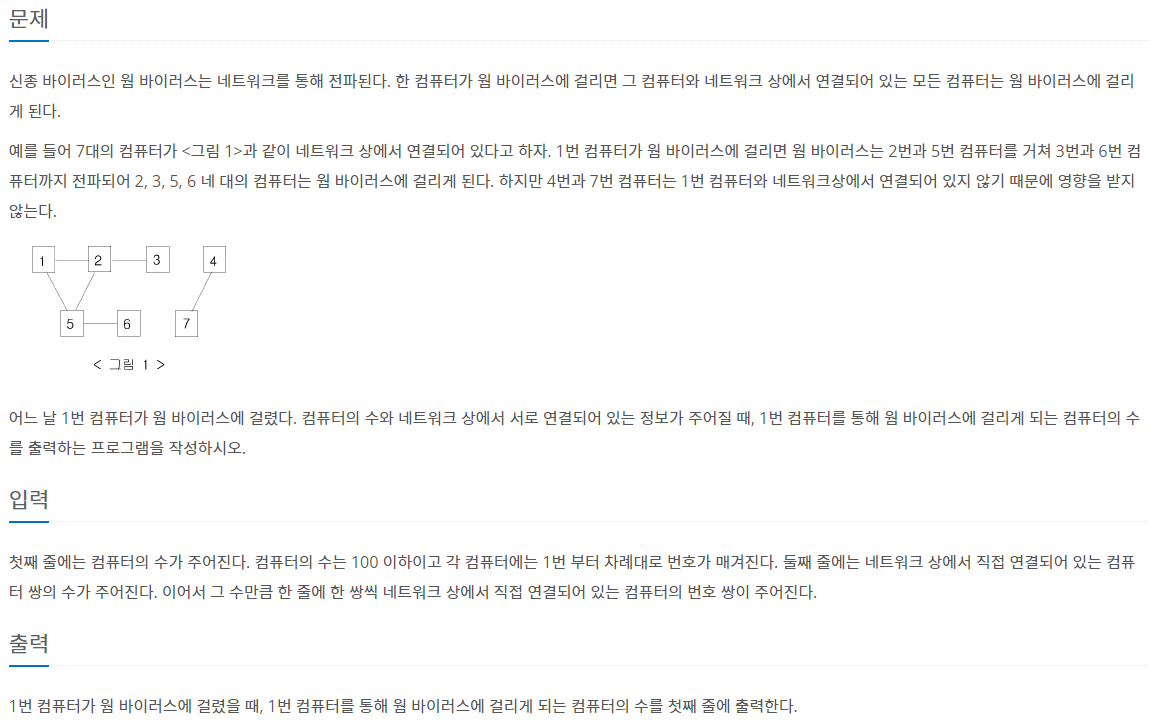

In [30]:
# 특정 원소가 속한 집합을 찾기
def find_parent(parent, x):
    # 루트 노드가 아니라면, 루트 노드를 찾을 때까지 재귀적으로 호출
    if parent[x] != x:
        return find_parent(parent, parent[x])
    return x

# 두 원소가 속한 집합을 합치기
def union_parent(parent, a, b):
    a = find_parent(parent, a)
    b = find_parent(parent, b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

v = int(input()) # 노드(컴퓨터) 개수
e = int(input()) # 간선(네트워크) 개수

parent = [0] * (v+1) # 부모 테이블 초기화

# 부모 테이블상에서, 부모를 자기 자신으로 초기화
for i in range(1, v+1):
    parent[i] = i
    
# union 연산을 각각 수행
for i in range(e):
    a, b = map(int, input().split())
    union_parent(parent, a, b)

cnt = 0
# 각 원소가 속한 집합 출력
for i in range(1, v+1):
    if find_parent(parent, i) == 1:
        cnt += 1

print(cnt-1)

7
6
1 2
2 3
1 5
5 2
5 6
4 7
4


## 친구 네트워크
- https://www.acmicpc.net/problem/4195

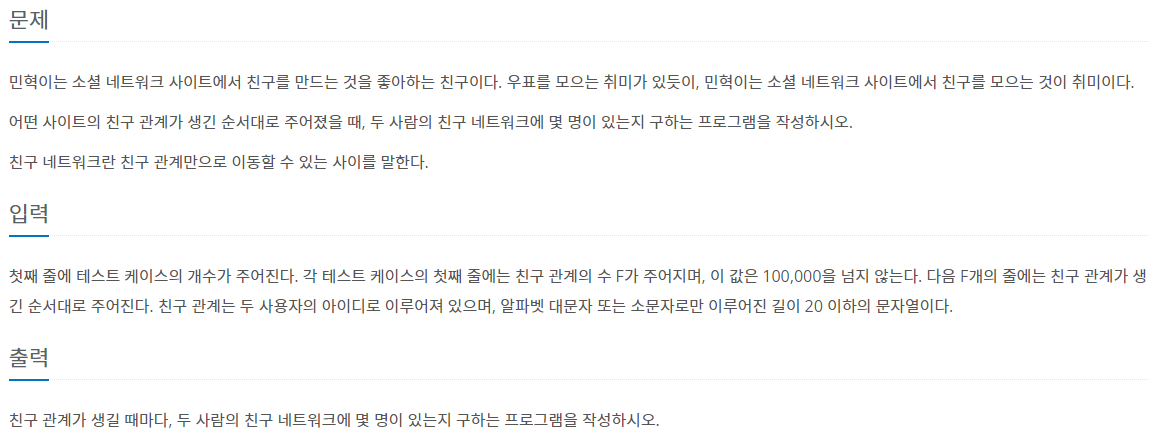

1. 두 사람을 입력받았을 때 parent_node에 두 사람이 있는지 확인

    - parent_node에 없을 경우 초기화

    - parent node를 본인으로 입력, 네트워크의 수를 1로 입력
    
    
2. union 함수 실행

    - 두 사람의 최상위 parent node를 찾아주는 find 함수 실행

    - 두 사람의 최상위 부모 노드를 연결한 후 네트워크의 개수 출력

In [31]:
# 자기 자신을 부모 노드로 두고 네트워크내 사람 수를 1로 초기화
def initialize(person):
    parent_node[person] = person
    number[person] = 1

# 해당 사람의 최상위 parent node 탐색
def find(person):
    if person == parent_node[person]:
        return person
    else:
        temp = find(parent_node[person])
        parent_node[person] = temp
        return parent_node[person]

# 두 최상위 parent node를 비교하여 다르면 연결
def union(person_a, person_b):
    person_a = find(person_a)
    person_b = find(person_b)

    if person_a != person_b:
        parent_node[person_b] = person_a
        number[person_a] += number[person_b]


t = int(input())

for _ in range(t):
    # 해당 사람과 parent node, 수를 입력하기 위해 dict()로 선언
    parent_node = dict()
    number = dict()

    f = int(input())

    for _ in range(f):
        person_a, person_b = input().split()

        if person_a not in parent_node:
            initialize(person_a)
        if person_b not in parent_node:
            initialize(person_b)

        union(person_a, person_b)
        print(number[find(person_a)])

2
3
Fred Barney
2
Barney Betty
3
Betty Wilma
4
3
Fred Barney
2
Betty Wilma
2
Barney Betty
4


## 문제집
- https://www.acmicpc.net/problem/1766
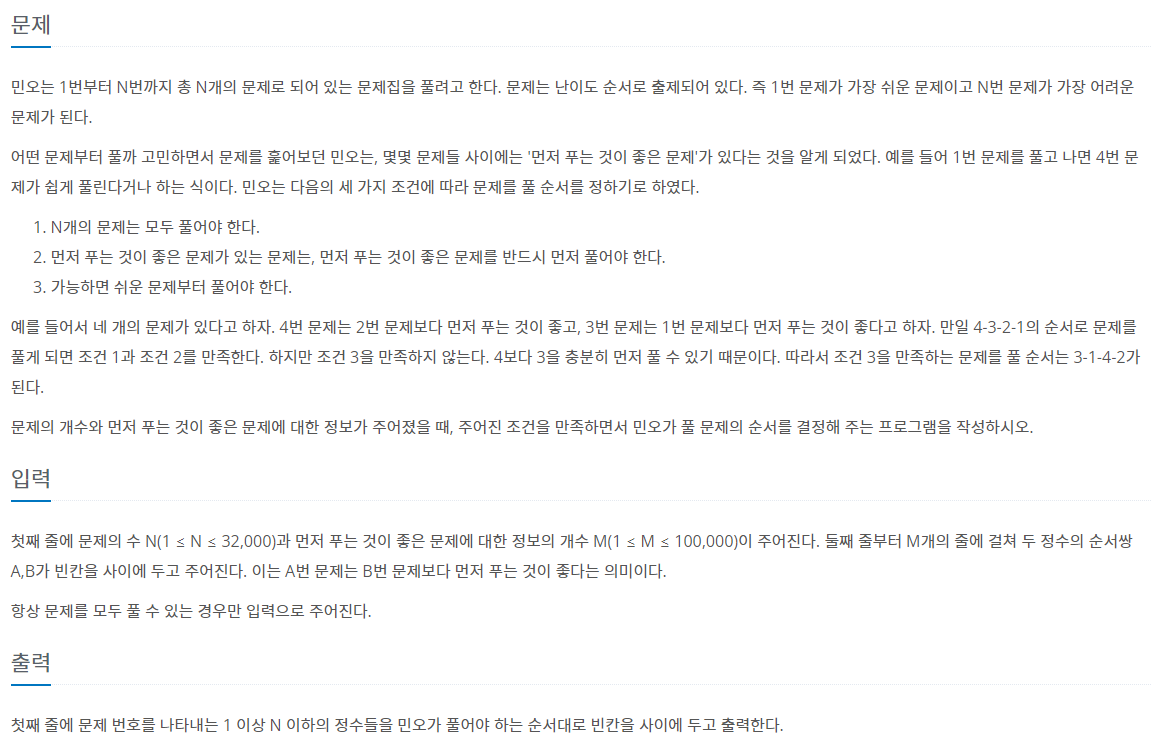

In [42]:
# import sys
# input = sys.stdin.readline()
import heapq


n, m = map(int, input().split())

answer = []
graph = [[] for _ in range(n + 1)]
indegree = [0 for _ in range(n+1)]
queue = []


for i in range(m):
    first, second = map(int, input().split())
    graph[first].append(second)
    indegree[second] += 1

for i in range(1, n + 1):
    if indegree[i] == 0:
        heapq.heappush(queue, i)

while queue:
    tmp = heapq.heappop(queue)
    answer.append(tmp)
    for i in graph[tmp]:
        indegree[i] -= 1
        if indegree[i] == 0:
            heapq.heappush(queue, i)


print(" ".join(map(str, answer)))

4 2
4 2
3 1
3 1 4 2
